In [2]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)


In [ ]:
import cv2
from pathlib import Path
from tqdm.notebook import tqdm
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt

from skimage import draw

from pathlib import Path
from skimage import io
from tqdm.notebook import tqdm

from skimage.transform import resize
from skimage.morphology import binary_dilation

In [ ]:
coefs = None
ratios = None

with open("../images_cropping/coefs.json", 'rb') as f:
    coefs = json.load(f)

with open("../images_cropping/ratios.json", 'rb') as f:
    ratios = json.load(f)

In [ ]:
def draw_dots(img, dots, radius):
    for i in dots:
        img = cv2.circle(img, (int(i[0]), int(i[1])), radius=int(radius), color=(255, 255, 255), thickness=-1)
    return img

dir_path = "large_certain/"

for file in tqdm([*(Path("../real_and_predicted_spikelets_plots/all_labels/" + dir_path)).glob('*.txt')]):
    name = str(file.stem)
    df = pd.read_csv(str(file), header = None, delimiter = " ", index_col=None)
    dot_radius = np.sqrt(coefs[name])
    
    WIDTH = img.shape[1]
    HEIGTH = img.shape[0]
    
    dots = []
    probs = list(df[5])
    xs = list(df[1])
    ys = list(df[2])
    
    for i in range(len(probs)):
        if probs[i] >= 0.6:
            dots.append((xs[i] * WIDTH, ys[i] * HEIGTH))
    
    suffix = ".jpg"
    if name[:5] == "Spike":
        suffix = ".JPG"
    img = cv2.imread("../../data/all_images/" + name + suffix)

    empty = np.zeros((HEIGTH, WIDTH, 3), dtype=np.uint8)
    # dots = zip(df[1] * WIDTH, df[2] * HEIGTH)
    img = draw_dots(empty, dots, dot_radius)

    cv2.imwrite("yolo_circles_masks/" + dir_path + name + ".png", img[:, :, 1])

[(2832, 2808), (2878, 2673), (2768, 2609), (2861, 2453), (2697, 2364), (2834, 2200), (2657, 2107), (2817, 1961), (2657, 1851), (2854, 1723), (2701, 1591), (2872, 1496), (2766, 1343), (2964, 1278), (2869, 1102), (3044, 1046), (3001, 840), (2998, 665)]
[(2791, 2702), (2984, 656), (2860, 2453), (2801, 1975), (2830, 1730), (2669, 1844), (2863, 1514), (2829, 2210), (2775, 1358), (2707, 1594), (2663, 2110), (2991, 835), (2698, 2372), (2941, 1284), (3040, 1043), (2870, 1123), (2763, 2608), (2831, 2804), (2883, 2674)]


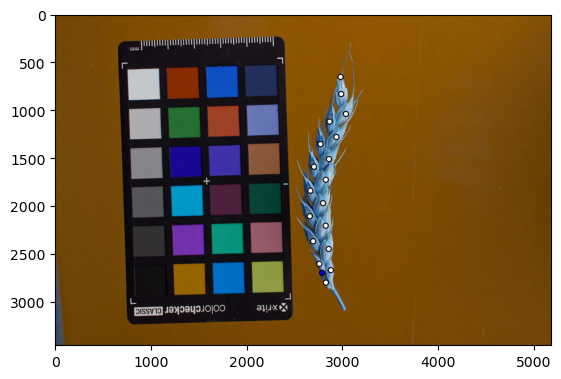

True

In [17]:
def draw_dots(img, x, y, radius, clr):
    img = cv2.circle(img, (int(x), int(y)), radius=int(radius), color=clr, thickness=-1)
    img = cv2.circle(img, (int(x), int(y)), radius=int(radius), color=(0, 0, 0), thickness=9)
    return img

name = "IMG_0375"
dot_radius = np.sqrt(coefs[name])

img = cv2.imread("../../data/all_images/" + name + ".jpg")
WIDTH = img.shape[1]
HEIGTH = img.shape[0]

file = Path("../real_and_predicted_spikelets_plots/all_labels/nano_equals/" + name + ".txt")
df = pd.read_csv(str(file), header = None, delimiter = " ", index_col=None)
pred_dots = []
probs = list(df[5])
xs = list(df[1])
ys = list(df[2])
for i in range(len(probs)):
    pred_dots.append((int(xs[i] * WIDTH), int(ys[i] * HEIGTH)))

roi = pd.read_csv("../../data/all_rois/" + name + ".roi2", delimiter=";", header=None)
dots = []
x = list(roi[0])
y = list(roi[1])
for i in range(len(roi)):
    dots.append((x[i], y[i]))
print(dots)
print(pred_dots)

# for i in range(len(roi)):
#     pair = dots[i]
#     img = draw_dots(img, pair[0], pair[1], dot_radius, (255, 255, 255))

for i in range(len(probs)):
    pair = pred_dots[i]
    img = draw_dots(img, pair[0], pair[1], dot_radius, (255, 255, 255))
    
pair = pred_dots[0]
img = draw_dots(img, pair[0], pair[1], dot_radius, (0, 0, 255))

# pair = pred_dots[1]
# img = draw_dots(img, pair[0], pair[1], dot_radius, (102, 102, 255))

# pair = pred_dots[2]
# img = draw_dots(img, pair[0], pair[1], dot_radius, (102, 102, 255))
# img = draw_dots(img, 2152, 846, dot_radius, (102, 102, 255))
plt.imshow(img)
plt.show()
cv2.imwrite("nano.png", img)

In [ ]:
def draw_centers(img, x, y, radius, c, limit, rad):
    img = cv2.circle(img, (int(x), int(y)), radius=10, color=c, thickness=-1)
    if limit:
        img = cv2.circle(img, (int(x), int(y)), radius=int(radius)*3, color=c, thickness=3)
    return img

def draw_dots(img, x, y, radius, c, limit, rad):
    img = cv2.circle(img, (int(x), int(y)), radius=10, color=c, thickness=-1)
    img = cv2.circle(img, (int(x), int(y)), radius=10, color=(0, 0, 0), thickness=2)
    if limit:
        img = cv2.circle(img, (int(x), int(y)), radius=int(radius)*3, color=c, thickness=3)
    return img


In [2]:
path = "IMG_0878.txt"
dot_radius = np.sqrt(coefs[str(Path(path).stem)])
df = pd.read_csv(path, header = None, delimiter = " ", index_col=None)

path = "IMG_0878.jpg"
img = cv2.imread(str(path))
WIDTH = img.shape[1]
HEIGTH = img.shape[0]

overlay = np.zeros((HEIGTH, WIDTH, 3), dtype=np.uint8)
overlay = cv2.addWeighted(overlay, 0.5, img, 0.8, 0)

roi = pd.read_csv("../../data/raw_rois/IMG_0878.roi2", delimiter=";", header=None)

x = list(roi[0])
y = list(roi[1])
for i in range(len(roi)):
    overlay = draw_centers(overlay, x[i], y[i], dot_radius, (255, 255, 255), True, 5)

x = list(df[1])
y = list(df[2])
for i in range(len(df)):
    overlay = draw_dots(overlay, x[i] * WIDTH, y[i] * HEIGTH, dot_radius, (80, 225, 0), False, int(dot_radius))
    
for k in [0, 1, 4, 9]:
    overlay = draw_dots(overlay, x[k] * WIDTH, y[k] * HEIGTH, dot_radius, (0, 0, 235), False, int(dot_radius))

text = '3mm'
overlay = cv2.putText(overlay, text, (2440, 1970), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,255,255), 4, cv2.LINE_AA)

cv2.imwrite("example.png", overlay)

True